# Machine Learning and Statistics Project 2020

## Project Question?

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests.

## Research

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases. Out of all the renewable energy alternatives, wind energy is the most developed technology worldwide with over 597GW capacity in 2018. A wind turbine’s blades sweep through a circular disk, known as the rotor disk (figure below). The power output by a wind turbine is a function of the kinetic energy flux through the rotor disk and the efficiency with which that energy can be captured. If the wind has an instantaneous speed u that is uniform throughout a rotor disk of diameter d, the power captured is:[1]

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/equation.PNG)

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/Turbine.png)

However, real wind turbines do not achieve this theoretical limit. Their performance is a function of aerodynamics and the need to limit power capture once the rated generator power is reached, at ‘rated’ wind speed. The generator power, turbine diameter and blade shape are optimized based on site characteristics such as annual average wind speed and the wind speed distribution. Turbine manufacturers measure their turbine’s ‘power curve’—the relationship between power output and wind speed—at turbine test sites.[1]

The power curve of a wind turbine presents the electrical power output ratings of the machine for different wind speeds. A typical wind turbine power curve has three main characteristic speeds: 1) cut-in (Vc ); 2) rated (Vr ); and 3) cut-out (Vs) speeds. The turbine starts generating power when the wind speed reaches the cut-in value. The rated speed is the wind speed at which the generator is producing the machine’s rated power. When the wind speed reaches the cut-out speed, the power generation is shut down to prevent defects and damages. Theoretical power curves are supplied by manufacturers assuming ideal meteorological and topographical conditions. In practice, however, wind turbines are never used under ideal conditions, and the empirical power curves could be substantially different from the theoretical ones due to the location of the turbine, air density, wind velocity distribution, wind direction, mechanical and control issues, as well as uncertainties in measurements [2]

Wind power is directly related to the wind speed through a so-called power curve. This is a simplified way of expressing the wind power in terms of atmospheric variables. Other atmospheric fields, such as wind shear, turbulence and air density have also impact on the actual power production for a given wind speed. However, for wind power verification wind speed is the most important parameter, because the bulk of the prediction error is caused by the wind speed prediction errors [3]

Given this relationship between wind speed and wind power generation, the efforts in our work will be focused on the prediction of the wind speed variable, because is the fundamental feature for the wind power generation.


![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/Wind%20speed%20power.png) 

In reality, one will see a swarm of points spread around the blue line, and not the neat curve in the graph.
The reason is that in practice the wind speed always fluctuates, and one cannot measure exactly the column of wind that passes through the rotor of the turbine. (It is not a workable solution just to place an anemometer in front of the turbine, since the turbine will also cast a "wind shadow" and brake the wind in front of itself).
In practice, therefore, one has to take an average of the different measurements for each wind speed, and plot the graph through these averages.Furthermore, it is difficult to make exact measurements of the wind speed itself. If one has a 3 per cent error in wind speed measurement, then the energy in the wind may be 9 per cent higher or lower (remember that the energy content varies with the third power of the wind speed).
Consequently, there may be errors up to plus or minus 10 per cent even in certified power curves.[8]

## Overview of data

In [14]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as kr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [15]:
ds = pd.read_csv("powerproduction.csv")

In [16]:
ds.columns

Index(['speed', 'power'], dtype='object')

In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [18]:
ds = pd.read_csv("powerproduction.csv")

In [19]:
ds.loc[2:8]

,speed,power
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048


In [20]:
print(ds.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


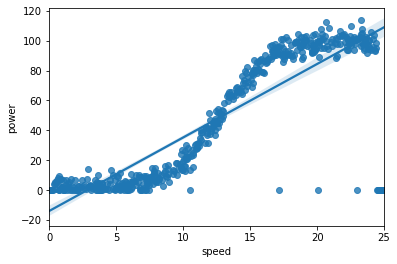

In [21]:
sns.regplot(x='speed',y='power',data = ds)
plt.show()

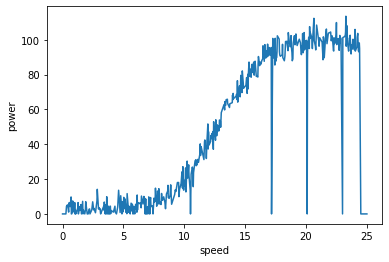

In [22]:
sns.lineplot(x='speed',y='power',data = ds)
plt.show()

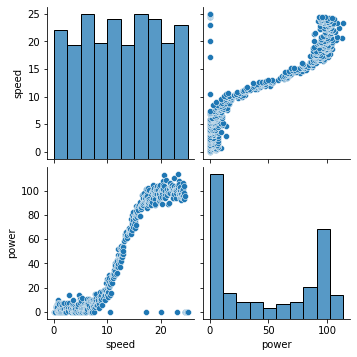

In [23]:
sns.pairplot(ds)

In [24]:
ds.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


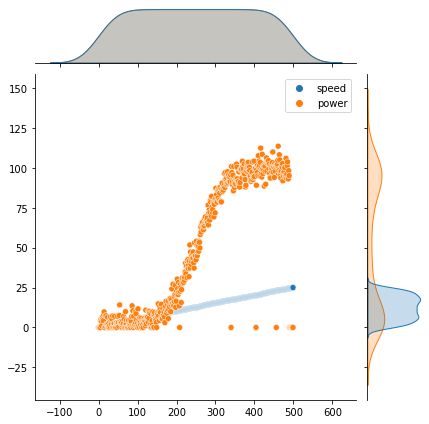

In [25]:
sns.jointplot( data = ds)

Looking at the raw data, there are days that the wind speed is 0.275 of below, when no power is generated. Also when speeds are 24.499 or geater. 

## Cleaning the data

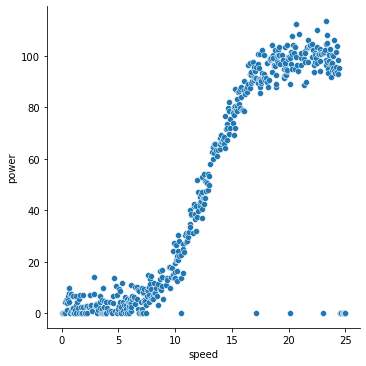

In [26]:
sns.relplot(x="speed", y="power", data=ds);

In [27]:
ds[ds.power == 0].count()

speed    49
power    49
dtype: int64

In [28]:
# Select data from speed & power = to 0.
clean_d = ds[(ds["speed"]==0) & (ds["power"]==0)]

# Values from cars where greater than 0
above_zero = ds[(ds["speed"]>0) & (ds["power"]>0)]

# Append data 
clean_d = clean_d.append(above_zero)

clean_d

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


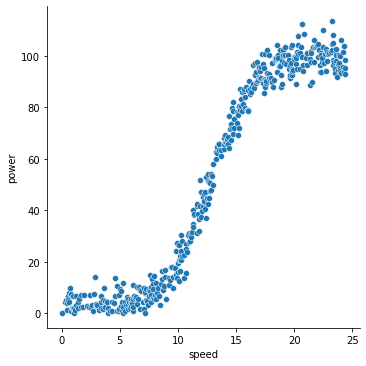

In [29]:
sns.relplot(x="speed", y="power", data=clean_d);

<AxesSubplot:xlabel='speed', ylabel='power'>

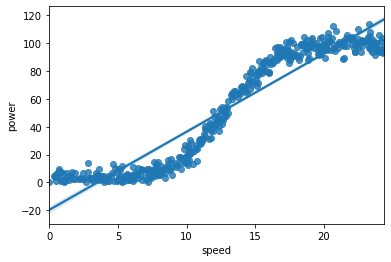

In [30]:
# Pick out two variables.
power = clean_d[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=clean_d)

##  Linear Regression


Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.[9] 

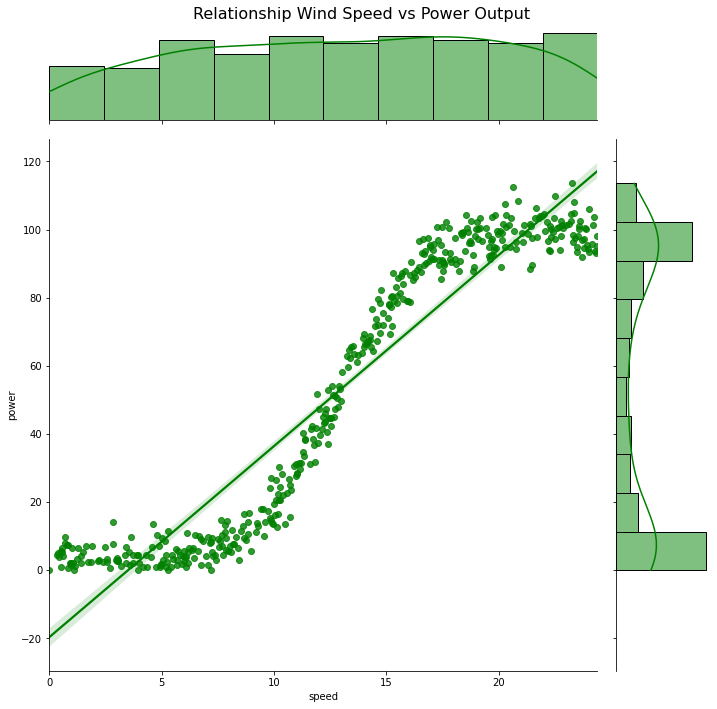

In [31]:
plot = sns.jointplot(x="speed", y="power",kind="reg", color="g", height=10, data=clean_d)

plt.subplots_adjust(top=0.95)
plt.suptitle("Relationship Wind Speed vs Power Output", fontsize = 16)

plt.show()

The power output from the turbine is not a linear function of wind speed (figure below), so, multivariate linear regression is not an appropriate technique. Non-linear regression assumes that the relationships are constant throughout the model space (i.e. power output is always proportional to Un), which from figure below is incorrect, so non-linear regression is also inappropriate. Also, multivariate bins only work where the training data includes data in all bins and so would be computationally or observationally more expensive. Instead, a technique is required that can capture non-linear changes in response to forcing.[7]

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/linear%20regression.PNG)

In [32]:
import sklearn.linear_model as lin

x = clean_d["speed"].to_numpy()
y = clean_d["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [33]:
r

0.8983450728341917

In [34]:
p

[-19.636232996770858, 5.606684691495636]

In [35]:
def f(x, p):
    return p[0] + x * p[1]

In [36]:
def predict(x):
    return f(x,p)

In [37]:
f(13,p)

53.25066799267242

In [38]:
predict(13)

53.25066799267242

In [39]:

predict(17.5)

78.48074910440278

In [40]:

predict(20)

92.49746083314187

In [41]:
import numpy as np
import matplotlib.pyplot as pl

In [42]:

x = clean_d["speed"].to_numpy()
y = clean_d["power"].to_numpy()

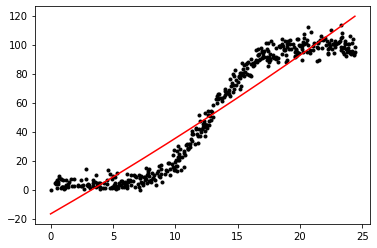

In [43]:

a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'r-');

In [44]:
a, b, c , d = np.polyfit(x, y, 3)

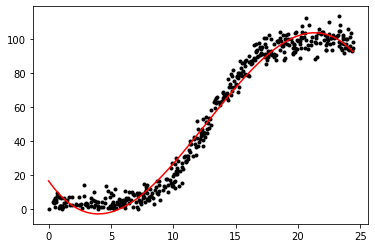

In [45]:
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x *x  +  c * x + d, 'r-');

## Neural Networks Model 

The basic computation unit in a neural network is a neuron, commonly referred to as a “node” or “unit”. The node receives input from other nodes or receives input from an external source and calculates the output. Each input is supplemented with “weight” (w), which depends on the relative importance of other inputs. Feed foward neural network is the first invented and simplest artificial neural network. It contains multiple neurons (nodes) arranged in multiple layers. Nodes in adjacent layers have connections or edges. All connections are equipped with weights. In the definition of MLP, there is at least one hidden layer (excluding one input layer and one output layer). The architecture of the fully connected neural network is as illustrated in Figure 4. The leftmost !circle represents the hidden layer, the middle circle corresponds to the hidden layer, the rightmost circle serves as output and the blue line represents weight. In the MLP architecture, each layer is fully connected. The MLP uses backpropagation to adjust the weight value during each training session. Following the MLP training, the calculation result can be output through layer-by-layer transfer. [3]

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/NNN.png)


Another common approach is based on the use of Artificial Neural Networks (ANN). The NWP forecasts and further meteorological variables are transformed into the wind power or speed forecast by ANN which has been trained by the large sets of historical data in order to learn the dependence of the output on input variables. The general ANN approach for wind speed and power forecast is shown in Fig above. 

ANN is one of the widely used statistical approaches for wind speed and power forecasts. It consists of an input layer, one or more hidden layers, and an output layer. Each layer has a number of artificial neurons, and it uses a connectionist approach to connect the neurons to the neurons of the previous layer. This approach is able to model the complex non-linear relationship between the input and output layers through a training and learning process. This approach does not require explicit mathematical expressions as used in the physical and statistical approaches reviewed previously. Furthermore, it has the ability of self-learning, self-organizing and self-adaption. [4]


In [46]:
dataset = clean_d.values

In [47]:
dataset

array([[0.00000e+00, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.05100e+00, 2.08500e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00, 1.20800e+00],
       [1.25100e+00, 3.37300e+00],
       [1.27600e+00, 6.51000e+00],
       [1.40100e+00, 4.15600e+00],
       [1.42600e+00, 2.00500e+00],
       [1.50200e+00, 5.35200e+00],
       [1.65200e+00, 7.22100e+00],
       [1.70200e+00, 2.43900e+00],
       [1.87700e+00,

In [48]:
X = dataset[:,0:1]

In [49]:
Y = dataset[:,1]

In [50]:
from sklearn import preprocessing

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [52]:
X_scale

array([[0.        ],
       [0.01332022],
       [0.01639411],
       [0.01844338],
       [0.02053363],
       [0.02155826],
       [0.02258289],
       [0.02360752],
       [0.02565679],
       [0.02770605],
       [0.02873069],
       [0.03282921],
       [0.03385385],
       [0.03487848],
       [0.03795238],
       [0.03897701],
       [0.04000164],
       [0.04102627],
       [0.04307554],
       [0.0451248 ],
       [0.04717406],
       [0.05127259],
       [0.05229723],
       [0.05742039],
       [0.05844502],
       [0.0615599 ],
       [0.06770769],
       [0.06975696],
       [0.07692938],
       [0.07795401],
       [0.08922497],
       [0.09127423],
       [0.09844666],
       [0.10152055],
       [0.10463544],
       [0.10566007],
       [0.11078323],
       [0.11590639],
       [0.11693102],
       [0.12102955],
       [0.12307881],
       [0.12410345],
       [0.12512808],
       [0.12615271],
       [0.13127587],
       [0.1384483 ],
       [0.13947293],
       [0.140

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [55]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [56]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error') 

In [58]:

model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 1ms/step - loss: 4406.6958
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 4403.0674
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 4399.2959
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 4395.6050
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 4391.8262
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 4387.9766
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 4384.0796
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 4380.1157
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 4376.1113
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 4372.1475
Epoch 11/500
10/10 [==============================] - 0s 2ms/step - loss: 4367.9438
Epoch 12/500
10/10 [==============================] - 0s 2ms/step - loss: 4363.8882
E

10/10 [==============================] - 0s 2ms/step - loss: 3798.5212
Epoch 99/500
10/10 [==============================] - 0s 1ms/step - loss: 3789.6855
Epoch 100/500
10/10 [==============================] - 0s 1ms/step - loss: 3780.5601
Epoch 101/500
10/10 [==============================] - 0s 2ms/step - loss: 3771.9561
Epoch 102/500
10/10 [==============================] - 0s 2ms/step - loss: 3762.9026
Epoch 103/500
10/10 [==============================] - 0s 2ms/step - loss: 3754.5305
Epoch 104/500
10/10 [==============================] - 0s 2ms/step - loss: 3745.2629
Epoch 105/500
10/10 [==============================] - 0s 3ms/step - loss: 3736.2737
Epoch 106/500
10/10 [==============================] - 0s 1ms/step - loss: 3727.2117
Epoch 107/500
10/10 [==============================] - 0s 1ms/step - loss: 3718.2773
Epoch 108/500
10/10 [==============================] - 0s 1ms/step - loss: 3708.9814
Epoch 109/500
10/10 [==============================] - 0s 2ms/step - loss: 3699.

10/10 [==============================] - 0s 1ms/step - loss: 2845.5938
Epoch 195/500
10/10 [==============================] - 0s 1ms/step - loss: 2835.4194
Epoch 196/500
10/10 [==============================] - 0s 1ms/step - loss: 2824.9214
Epoch 197/500
10/10 [==============================] - 0s 1ms/step - loss: 2814.5994
Epoch 198/500
10/10 [==============================] - 0s 1ms/step - loss: 2804.2817
Epoch 199/500
10/10 [==============================] - 0s 2ms/step - loss: 2793.9231
Epoch 200/500
10/10 [==============================] - 0s 2ms/step - loss: 2783.4480
Epoch 201/500
10/10 [==============================] - 0s 2ms/step - loss: 2773.1794
Epoch 202/500
10/10 [==============================] - 0s 2ms/step - loss: 2762.9072
Epoch 203/500
10/10 [==============================] - 0s 2ms/step - loss: 2752.5557
Epoch 204/500
10/10 [==============================] - 0s 2ms/step - loss: 2741.9568
Epoch 205/500
10/10 [==============================] - 0s 1ms/step - loss: 2732

10/10 [==============================] - 0s 1ms/step - loss: 1922.7341
Epoch 291/500
10/10 [==============================] - 0s 1ms/step - loss: 1914.3263
Epoch 292/500
10/10 [==============================] - 0s 1ms/step - loss: 1905.7424
Epoch 293/500
10/10 [==============================] - 0s 1ms/step - loss: 1898.0154
Epoch 294/500
10/10 [==============================] - 0s 1ms/step - loss: 1889.2025
Epoch 295/500
10/10 [==============================] - 0s 1ms/step - loss: 1881.1741
Epoch 296/500
10/10 [==============================] - 0s 1ms/step - loss: 1873.1110
Epoch 297/500
10/10 [==============================] - 0s 1ms/step - loss: 1864.9733
Epoch 298/500
10/10 [==============================] - 0s 1ms/step - loss: 1856.6716
Epoch 299/500
10/10 [==============================] - 0s 902us/step - loss: 1848.6250
Epoch 300/500
10/10 [==============================] - 0s 1ms/step - loss: 1840.7672
Epoch 301/500
10/10 [==============================] - 0s 1ms/step - loss: 18

10/10 [==============================] - 0s 1ms/step - loss: 1289.5956
Epoch 387/500
10/10 [==============================] - 0s 1ms/step - loss: 1284.7231
Epoch 388/500
10/10 [==============================] - 0s 1ms/step - loss: 1280.2124
Epoch 389/500
10/10 [==============================] - 0s 902us/step - loss: 1275.5289
Epoch 390/500
10/10 [==============================] - 0s 1ms/step - loss: 1270.9689
Epoch 391/500
10/10 [==============================] - 0s 1ms/step - loss: 1266.3013
Epoch 392/500
10/10 [==============================] - 0s 1ms/step - loss: 1261.8507
Epoch 393/500
10/10 [==============================] - 0s 1ms/step - loss: 1257.2941
Epoch 394/500
10/10 [==============================] - 0s 1ms/step - loss: 1252.9460
Epoch 395/500
10/10 [==============================] - 0s 1ms/step - loss: 1248.6056
Epoch 396/500
10/10 [==============================] - 0s 1ms/step - loss: 1244.0096
Epoch 397/500
10/10 [==============================] - 0s 1ms/step - loss: 12

10/10 [==============================] - 0s 1ms/step - loss: 994.2607
Epoch 482/500
10/10 [==============================] - 0s 2ms/step - loss: 992.3334
Epoch 483/500
10/10 [==============================] - 0s 2ms/step - loss: 990.5783
Epoch 484/500
10/10 [==============================] - 0s 1ms/step - loss: 988.8925
Epoch 485/500
10/10 [==============================] - 0s 1ms/step - loss: 987.1987
Epoch 486/500
10/10 [==============================] - 0s 1ms/step - loss: 985.5145
Epoch 487/500
10/10 [==============================] - 0s 1ms/step - loss: 983.8694
Epoch 488/500
10/10 [==============================] - 0s 1ms/step - loss: 982.2548
Epoch 489/500
10/10 [==============================] - 0s 2ms/step - loss: 980.4874
Epoch 490/500
10/10 [==============================] - 0s 1ms/step - loss: 978.9920
Epoch 491/500
10/10 [==============================] - 0s 1ms/step - loss: 977.3510
Epoch 492/500
10/10 [==============================] - 0s 2ms/step - loss: 975.8603
Epoch 

In [59]:
model.predict([1.0,2.0,3.0])

array([[ 68.950325],
       [106.60564 ],
       [144.26097 ]], dtype=float32)

In [40]:

o.mean()

speed    2.5751
power    4.5590
dtype: float64

"The principal components are then passed to the deep learning algorithm. TensorFlow is an
open source machine learning-based repository that works in extensive heterogeneous and complex
environments. It is used for a high level of computation, training data, sharing the state and the
operations used to mutate the states by dataflow graphs. It enables presentation of computations on
each node that may own or renew the mutable state in a dataflow graph. TensorFlow collects the node
information from the dataflow graph in a cluster through different machines and, further, throughout
numerous computational devices, for example, multicore central processing unit (CPU) and graphics
processing unit (GPU). It provides a flexible environment to the application developer and allows the
design of novel and optimized algorithms. It provides different types of applications for inference and
to train the deep neural network."[10]

import tensorflow.keras as k [11]


In [8]:
import tensorflow.keras as kr

In [9]:
model = kr.models.Sequential()

In [10]:

model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

In [11]:

model.compile('adam', loss='mean_squared_error')

In [77]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 4ms/step - loss: 242685.9219
Epoch 2/500
46/46 [==============================] - 0s 3ms/step - loss: 206632.9062
Epoch 3/500
46/46 [==============================] - 0s 3ms/step - loss: 184433.7500
Epoch 4/500
46/46 [==============================] - 0s 5ms/step - loss: 168268.2812
Epoch 5/500
46/46 [==============================] - 0s 3ms/step - loss: 155404.8750
Epoch 6/500
46/46 [==============================] - 0s 3ms/step - loss: 144597.9531
Epoch 7/500
46/46 [==============================] - 0s 3ms/step - loss: 135247.8125
Epoch 8/500
46/46 [==============================] - 0s 3ms/step - loss: 127048.2891
Epoch 9/500
46/46 [==============================] - 0s 3ms/step - loss: 119586.5078
Epoch 10/500
46/46 [==============================] - 0s 3ms/step - loss: 112948.2891
Epoch 11/500
46/46 [==============================] - 0s 3ms/step - loss: 106868.4609
Epoch 12/500
46/46 [==============================] - 0s 3ms/st

46/46 [==============================] - 0s 2ms/step - loss: 2844.2993
Epoch 97/500
46/46 [==============================] - 0s 2ms/step - loss: 2711.5588
Epoch 98/500
46/46 [==============================] - 0s 2ms/step - loss: 2583.1418
Epoch 99/500
46/46 [==============================] - 0s 2ms/step - loss: 2461.8945
Epoch 100/500
46/46 [==============================] - 0s 3ms/step - loss: 2343.8772
Epoch 101/500
46/46 [==============================] - 0s 3ms/step - loss: 2233.0608
Epoch 102/500
46/46 [==============================] - 0s 3ms/step - loss: 2124.5762
Epoch 103/500
46/46 [==============================] - 0s 3ms/step - loss: 2021.5098
Epoch 104/500
46/46 [==============================] - 0s 2ms/step - loss: 1922.7241
Epoch 105/500
46/46 [==============================] - 0s 2ms/step - loss: 1828.8508
Epoch 106/500
46/46 [==============================] - 0s 2ms/step - loss: 1740.4060
Epoch 107/500
46/46 [==============================] - 0s 2ms/step - loss: 1656.99

Epoch 193/500
46/46 [==============================] - 0s 3ms/step - loss: 235.5701
Epoch 194/500
46/46 [==============================] - 0s 2ms/step - loss: 235.3334
Epoch 195/500
46/46 [==============================] - 0s 2ms/step - loss: 235.1056
Epoch 196/500
46/46 [==============================] - 0s 2ms/step - loss: 234.8839
Epoch 197/500
46/46 [==============================] - 0s 2ms/step - loss: 234.6432
Epoch 198/500
46/46 [==============================] - 0s 3ms/step - loss: 234.4146
Epoch 199/500
46/46 [==============================] - 0s 3ms/step - loss: 234.1707
Epoch 200/500
46/46 [==============================] - 0s 3ms/step - loss: 233.9440
Epoch 201/500
46/46 [==============================] - 0s 3ms/step - loss: 233.6742
Epoch 202/500
46/46 [==============================] - 0s 3ms/step - loss: 233.3955
Epoch 203/500
46/46 [==============================] - 0s 2ms/step - loss: 233.2115
Epoch 204/500
46/46 [==============================] - 0s 2ms/step - loss: 2

46/46 [==============================] - 0s 3ms/step - loss: 200.6626
Epoch 291/500
46/46 [==============================] - 0s 3ms/step - loss: 200.3337
Epoch 292/500
46/46 [==============================] - 0s 5ms/step - loss: 200.0210
Epoch 293/500
46/46 [==============================] - 0s 2ms/step - loss: 199.5382
Epoch 294/500
46/46 [==============================] - 0s 3ms/step - loss: 199.1593
Epoch 295/500
46/46 [==============================] - 0s 3ms/step - loss: 198.7641
Epoch 296/500
46/46 [==============================] - 0s 3ms/step - loss: 198.4131
Epoch 297/500
46/46 [==============================] - 0s 3ms/step - loss: 197.9745
Epoch 298/500
46/46 [==============================] - 0s 4ms/step - loss: 197.6179
Epoch 299/500
46/46 [==============================] - 0s 2ms/step - loss: 197.5950
Epoch 300/500
46/46 [==============================] - 0s 2ms/step - loss: 197.1085
Epoch 301/500
46/46 [==============================] - 0s 2ms/step - loss: 196.4608
Epoch 

46/46 [==============================] - 0s 2ms/step - loss: 175.6396
Epoch 388/500
46/46 [==============================] - 0s 2ms/step - loss: 175.5216
Epoch 389/500
46/46 [==============================] - 0s 1ms/step - loss: 175.2048
Epoch 390/500
46/46 [==============================] - 0s 2ms/step - loss: 174.9818
Epoch 391/500
46/46 [==============================] - 0s 2ms/step - loss: 174.9050
Epoch 392/500
46/46 [==============================] - 0s 3ms/step - loss: 174.9924
Epoch 393/500
46/46 [==============================] - 0s 3ms/step - loss: 174.7328
Epoch 394/500
46/46 [==============================] - 0s 3ms/step - loss: 174.9529
Epoch 395/500
46/46 [==============================] - 0s 2ms/step - loss: 174.4734
Epoch 396/500
46/46 [==============================] - 0s 4ms/step - loss: 174.5651
Epoch 397/500
46/46 [==============================] - 0s 2ms/step - loss: 174.1773
Epoch 398/500
46/46 [==============================] - 0s 3ms/step - loss: 174.0414
Epoch 

46/46 [==============================] - 0s 3ms/step - loss: 168.5310
Epoch 485/500
46/46 [==============================] - 0s 2ms/step - loss: 168.5127
Epoch 486/500
46/46 [==============================] - 0s 2ms/step - loss: 168.3529
Epoch 487/500
46/46 [==============================] - 0s 2ms/step - loss: 168.3671
Epoch 488/500
46/46 [==============================] - 0s 3ms/step - loss: 168.3323
Epoch 489/500
46/46 [==============================] - 0s 2ms/step - loss: 168.3048
Epoch 490/500
46/46 [==============================] - 0s 3ms/step - loss: 168.3142
Epoch 491/500
46/46 [==============================] - 0s 2ms/step - loss: 168.1936
Epoch 492/500
46/46 [==============================] - 0s 2ms/step - loss: 168.4100
Epoch 493/500
46/46 [==============================] - 0s 3ms/step - loss: 168.5879
Epoch 494/500
46/46 [==============================] - 0s 3ms/step - loss: 168.0901
Epoch 495/500
46/46 [==============================] - 0s 2ms/step - loss: 168.1839
Epoch 

In [40]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(9, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [41]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 1ms/step - loss: 4562.7432
Epoch 2/500
46/46 [==============================] - 0s 2ms/step - loss: 4525.2954
Epoch 3/500
46/46 [==============================] - 0s 2ms/step - loss: 4486.6475
Epoch 4/500
46/46 [==============================] - 0s 2ms/step - loss: 4451.2744
Epoch 5/500
46/46 [==============================] - 0s 1ms/step - loss: 4405.5098
Epoch 6/500
46/46 [==============================] - 0s 2ms/step - loss: 4338.0244
Epoch 7/500
46/46 [==============================] - 0s 2ms/step - loss: 4246.2295
Epoch 8/500
46/46 [==============================] - 0s 2ms/step - loss: 4126.0845
Epoch 9/500
46/46 [==============================] - 0s 1ms/step - loss: 4001.4067
Epoch 10/500
46/46 [==============================] - 0s 1ms/step - loss: 3919.3975
Epoch 11/500
46/46 [==============================] - 0s 2ms/step - loss: 3873.3726
Epoch 12/500
46/46 [==============================] - 0s 2ms/step - loss: 3837.0056
E

46/46 [==============================] - 0s 1ms/step - loss: 2135.2441
Epoch 99/500
46/46 [==============================] - 0s 3ms/step - loss: 2119.6379
Epoch 100/500
46/46 [==============================] - 0s 2ms/step - loss: 2104.3533
Epoch 101/500
46/46 [==============================] - 0s 1ms/step - loss: 2089.0723
Epoch 102/500
46/46 [==============================] - 0s 1ms/step - loss: 2074.0198
Epoch 103/500
46/46 [==============================] - 0s 1ms/step - loss: 2058.7271
Epoch 104/500
46/46 [==============================] - 0s 850us/step - loss: 2043.7423
Epoch 105/500
46/46 [==============================] - 0s 1ms/step - loss: 2028.8250
Epoch 106/500
46/46 [==============================] - 0s 872us/step - loss: 2013.9899
Epoch 107/500
46/46 [==============================] - 0s 1ms/step - loss: 1999.1201
Epoch 108/500
46/46 [==============================] - 0s 1ms/step - loss: 1984.4219
Epoch 109/500
46/46 [==============================] - 0s 2ms/step - loss: 1

46/46 [==============================] - 0s 1ms/step - loss: 924.0590
Epoch 195/500
46/46 [==============================] - 0s 1ms/step - loss: 910.8677
Epoch 196/500
46/46 [==============================] - 0s 894us/step - loss: 898.5309
Epoch 197/500
46/46 [==============================] - 0s 872us/step - loss: 886.2283
Epoch 198/500
46/46 [==============================] - 0s 1ms/step - loss: 874.8303
Epoch 199/500
46/46 [==============================] - 0s 2ms/step - loss: 863.3345
Epoch 200/500
46/46 [==============================] - 0s 2ms/step - loss: 852.1785
Epoch 201/500
46/46 [==============================] - 0s 2ms/step - loss: 841.2776
Epoch 202/500
46/46 [==============================] - 0s 1ms/step - loss: 830.6219
Epoch 203/500
46/46 [==============================] - 0s 959us/step - loss: 820.3873
Epoch 204/500
46/46 [==============================] - 0s 981us/step - loss: 810.0421
Epoch 205/500
46/46 [==============================] - 0s 1ms/step - loss: 799.842

46/46 [==============================] - 0s 894us/step - loss: 25.0926
Epoch 388/500
46/46 [==============================] - 0s 1ms/step - loss: 24.6348
Epoch 389/500
46/46 [==============================] - 0s 981us/step - loss: 24.2571
Epoch 390/500
46/46 [==============================] - 0s 937us/step - loss: 23.7697
Epoch 391/500
46/46 [==============================] - 0s 915us/step - loss: 23.4045
Epoch 392/500
46/46 [==============================] - 0s 872us/step - loss: 23.0935
Epoch 393/500
46/46 [==============================] - 0s 1ms/step - loss: 22.7661
Epoch 394/500
46/46 [==============================] - 0s 850us/step - loss: 22.3809
Epoch 395/500
46/46 [==============================] - 0s 1ms/step - loss: 22.0969
Epoch 396/500
46/46 [==============================] - 0s 1ms/step - loss: 21.6749
Epoch 397/500
46/46 [==============================] - 0s 1ms/step - loss: 21.4779
Epoch 398/500
46/46 [==============================] - 0s 981us/step - loss: 21.1354
Epoc

In [81]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.save_weights("wind_power_weights")
model.save('wind_power')

INFO:tensorflow:Assets written to: wind_power\assets


In [85]:
from tensorflow.keras.models import load_model
new_model = load_model('wind_power')

In [87]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [65]:
score = model.evaluate(x, y, verbose=0)
score

266218.5

In [66]:

model.predict([0.5])

array([[50.122658]], dtype=float32)

In [67]:

model.predict([1.5])

array([[87.777985]], dtype=float32)

In [68]:

model.predict([2.5])

array([[125.433304]], dtype=float32)

In [54]:

model.predict([5])

array([[4.0894823]], dtype=float32)

No handles with labels found to put in legend.


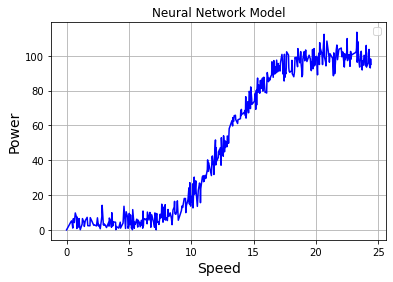

In [76]:

plt.plot(X, y, 'b')
plt.xlabel('Speed', fontsize='14')
plt.ylabel('Power', fontsize='14')
plt.title("Neural Network Model")
plt.grid()
plt.legend()

Technical improvements over the past decade have increased the size and power output capacity of wind power plants. Small increases in power performance are now financially attractive to owners. For this reason, the need for more accurate evaluations of wind turbine power curves is increasing. New investigations are underway with the main objective of improving the precision of power curve modeling. Due to the non-linear relationship between the power output of a turbine and its primary and derived parameters, Artificial Neural Network (ANN) has proven to be well suited for power curve modelling. It has been shown that a multi-stage modelling techniques using multilayer perceptron with two layers of neurons was able to reduce the level of both the absolute and random error.[5]

## References

1.<https://upcommons.upc.edu/bitstream/handle/2117/117771/131678.pdf>file:///C:/Users/Niamh/Downloads/Using_machine_learning_to_predict_wind_turbine_pow.pdf
2. https://medium.com/planet-os/calculating-energy-production-from-weather-forecast-in-python-3c990047daa
3. A Short-Term Wind Speed Forecasting Model by Using Artificial Neural Networks with Stochastic Optimization for Renewable Energy Systems Chiou-Jye Huang 1 and Ping-Huan Kuo 2
4. https://upcommons.upc.edu/bitstream/handle/2117/117771/131678.pdf
5. Wind turbine power curve modelling using artificial neural network Author links open overlay panelFrancisPelletieraChristianMassonbAntoineTahanb
6. https://hal.archives-ouvertes.fr/hal-01373429v2/document
7. file:///C:/Users/Niamh/Downloads/Using_machine_learning_to_predict_wind_turbine_pow.pdf
8. http://xn--drmstrre-64ad.dk/wp-content/wind/miller/windpower%20web/en/tour/wres/pwr.htm
9. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm
10.https://search.proquest.com/openview/d9b7dcb7acd44c890773b8de6e8e97c5/1?pq-origsite=gscholar&cbl=2032402
11. https://www.tensorflow.org/neural_structured_learning
12. https://www.tensorflow.org/guide/keras/sequential_model
13. https://github.com/topics/wind-turbine